SETEO DE DISPLAY Y CARGA DE DATOS DESDE EL CSV:

In [ ]:
!git clone https://github.com/briella-codes/coffee_survey.git
%cd coffee_survey
!ls

import sys
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

ROOT_DIR = Path().resolve().parents[0]
sys.path.append(str(ROOT_DIR))

from src.main import display_styled, load_data, standardize_columns, simplevalue_str_columns,int_value_columns, split_multivalue_columns, clean_ranges_improved_minmax,clean_ranges_columns_minmax, create_csv,column_countBy_ranges,column_countBy, color_intercalado,clean_ranges_age

pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'left')
survey_df = load_data('data/raw/coffee_survey.csv', "utf-8")
import sys
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

ROOT_DIR = Path().resolve().parents[0]
sys.path.append(str(ROOT_DIR))

from src.main import display_styled, load_data, standardize_columns, simplevalue_str_columns,int_value_columns, split_multivalue_columns, clean_ranges_improved_minmax,clean_ranges_columns_minmax, create_csv,column_countBy_ranges,column_countBy, color_intercalado,clean_ranges_age

pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'left')
survey_df = load_data('data/raw/coffee_survey.csv', "utf-8")

DATOS ORIGINALES (VISTA PREVIA DE ALGUNAS COLUMNAS Y PRIMEROS REGISTROS)

In [2]:
display_styled(survey_df[['age','cups','where_drink','favorite','additions','sweetener']],16)

,age,cups,where_drink,favorite,additions,sweetener
0,18-24 years old,NA,NA,Regular drip coffee,No - just black,NA
1,25-34 years old,NA,NA,Iced coffee,"Sugar or sweetener, No - just black",NA
2,25-34 years old,NA,NA,Regular drip coffee,No - just black,NA
3,35-44 years old,NA,NA,Iced coffee,"No - just black, Cinnamon",NA
4,25-34 years old,NA,NA,Latte,No - just black,NA
5,55-64 years old,NA,NA,Iced coffee,Half & half,NA
6,18-24 years old,NA,"At a cafe, At the office, At home, On the go",Pourover,No - just black,NA
7,NA,NA,NA,NA,NA,NA
8,25-34 years old,Less than 1,At a cafe,Regular drip coffee,No - just black,NA
9,NA,NA,NA,NA,NA,NA


In [3]:
survey_df = standardize_columns(survey_df)
#Columnas escalares y columnas de texto libre u opiniones:
columns_to_str =    ['submission_id', 'gender','favorite','favorite_specify', 'brew_other','style','purchase_other','additions_other',
                    'caffeine','roast_level','strength','coffee_a_notes','coffee_b_notes','coffee_c_notes','coffee_d_notes','prefer_abc',
                    'prefer_ad','prefer_overall','wfh', 'why_drink_other','taste','know_source','value_cafe','value_equipment','gender_specify',
                    'education_level','ethnicity_race','ethnicity_race_specify','employment_status','political_affiliation']
#Columnas ordinales / puntuaciones:
columns_to_int =    ['expertise','coffee_a_bitterness','coffee_a_acidity','coffee_a_personal_preference','coffee_b_bitterness',
                    'coffee_b_acidity','coffee_b_personal_preference','coffee_c_bitterness','coffee_c_acidity','coffee_c_personal_preference',
                    'coffee_d_bitterness','coffee_d_acidity','coffee_d_personal_preference']
#Columnas multivalor:
columns_to_split =  ['where_drink','additions', 'brew','purchase','dairy','sweetener','why_drink']
#Columnas de rangos: (se crearan dos columnas mas con min y max para cada una)
columns_to_range_minmax = ['age','cups','total_spend','most_paid','most_willing','spent_equipment','number_children']
#Patters para excepciones en columnas multivalores
patterns = {'additions' : r", (?=[A-Z])"}
#Procesamiento de datos:
survey_df = simplevalue_str_columns(survey_df, columns_to_str)
survey_df = split_multivalue_columns(survey_df, columns_to_split, col_patterns = patterns)
survey_df = int_value_columns(survey_df,columns_to_int)
survey_df = clean_ranges_columns_minmax(survey_df,columns_to_range_minmax)
survey_df = clean_ranges_age(survey_df)

CLEANING, DETECCION DE NULOS Y FALTANTES, CORRECCION DE TIPOS, FEATURES, NORMALIZACION, AGREGADO DE COLUMNAS PARA CLUSTERING ETC

CREACIÓN DE UN NUEVO CSV 'coffee_survey_data_processed.csv'

Y DISPLAY DATOS YA PROCESADOS APTOS PARA ANALISIS (VISTA PREVIA DE ALGUNAS COLUMNAS CON PRIMEROS REGISTROS- para ver todos los registros consultar el csv nuevo generado):

In [13]:
excluded_columns = ['age','submission_id','brew_other','cups','cups_from_min','cups_to_max','purchase','purchase_other','favorite_specify','additions_other','coffee_a_notes','coffee_b_notes','coffee_c_notes','coffee_d_notes','coffee_a_bitterness','coffee_a_acidity','coffee_a_personal_preference','coffee_b_bitterness','coffee_b_acidity','coffee_b_personal_preference','coffee_c_bitterness','coffee_c_acidity','coffee_c_personal_preference','coffee_d_bitterness','coffee_d_acidity','coffee_d_personal_preference','prefer_abc','prefer_ad','prefer_overall']
display_styled(survey_df.loc[:,~survey_df.columns.isin(excluded_columns)] , head=20)
create_csv(survey_df,"coffee_survey_data_processed.csv")

,age_from_min,age_to_max,where_drink,brew,favorite,additions,dairy,sweetener,style,strength,roast_level,caffeine,expertise,wfh,total_spend,total_spend_from_min,total_spend_to_max,why_drink,why_drink_other,taste,know_source,most_paid,most_paid_from_min,most_paid_to_max,most_willing,most_willing_from_min,most_willing_to_max,value_cafe,spent_equipment,spent_equipment_from_min,spent_equipment_to_max,value_equipment,gender,gender_specify,education_level,ethnicity_race,ethnicity_race_specify,employment_status,number_children,number_children_from_min,number_children_to_max,political_affiliation
0,18.0,24.0,<NA>,<NA>,Regular drip coffee,[No - just black],<NA>,<NA>,Complex,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,25.0,34.0,<NA>,[Pod/capsule machine (e.g. Keurig/Nespresso)],Iced coffee,"[Sugar or sweetener, No - just black]",<NA>,<NA>,Light,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,25.0,34.0,<NA>,[Bean-to-cup machine],Regular drip coffee,[No - just black],<NA>,<NA>,Complex,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,35.0,44.0,<NA>,[Coffee brewing machine (e.g. Mr. Coffee)],Iced coffee,"[No - just black, Cinnamon]",<NA>,<NA>,Complex,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,25.0,34.0,<NA>,[Pour over],Latte,[No - just black],<NA>,<NA>,Sweet,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5,55.0,64.0,<NA>,"[Pod/capsule machine (e.g. Keurig/Nespresso), Espresso, French press]",Iced coffee,[Half & half],<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
6,18.0,24.0,"[At a cafe, At the office, At home, On the go]","[Pour over, French press, Espresso, Instant coffee, Pod/capsule machine (e.g. Keurig/Nespresso)]",Pourover,[No - just black],<NA>,<NA>,Complex,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
8,25.0,34.0,[At a cafe],<NA>,Regular drip coffee,[No - just black],<NA>,<NA>,Light,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
9,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


NUMBERS OF CONSUMERS BY ADDITIVES AND BY AGE GROUP:

In [11]:
#print("Conteo Favorite coffees by age group:")
#display_styled(column_countBy(survey_df,'age','favorite'))
print("Conteo de consumidores por aditivo y por grupo etarios:")
display_styled(column_countBy(survey_df,'age','additions'))
#display_styled(column_countBy(survey_df,'additions','brew'))

Conteo de consumidores por aditivo y por grupo etarios:


PIE CHART OF RECORD COUNT BY AGE GROUP:

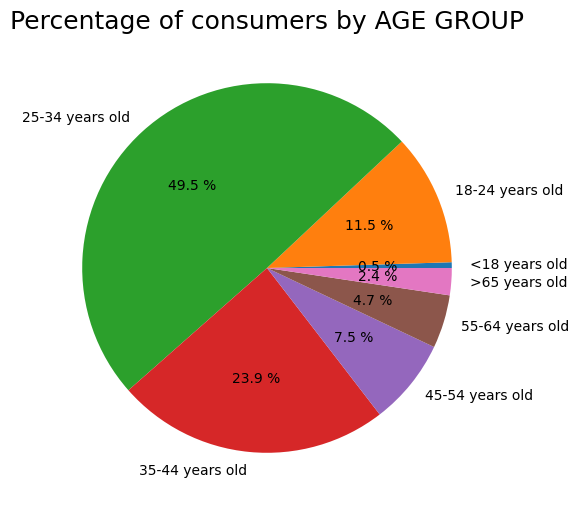

In [6]:
serie_age_group = column_countBy(survey_df,'age')
df_serie_age_group = serie_age_group.to_frame('count').reset_index()

plt.figure(figsize=(10,6))
plt.title("Percentage of consumers by AGE GROUP", fontsize=18)
plt.pie(df_serie_age_group.iloc[:,1], labels = df_serie_age_group.iloc[:,0], autopct="%0.1f %%")
plt.show()

BAR CHART OF FAVOURITE COFFEE BY AGE GROUP:

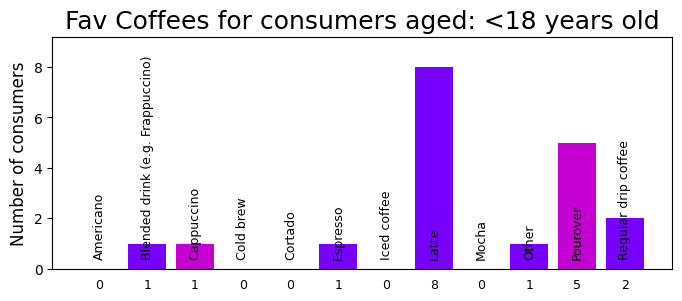

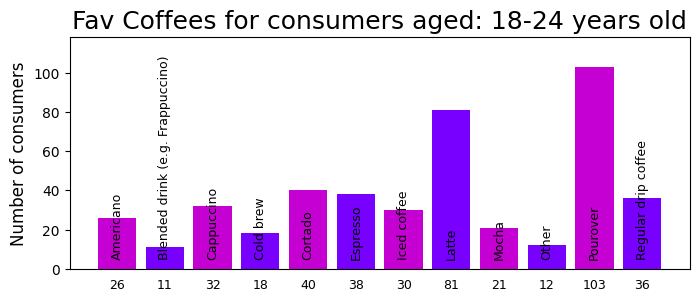

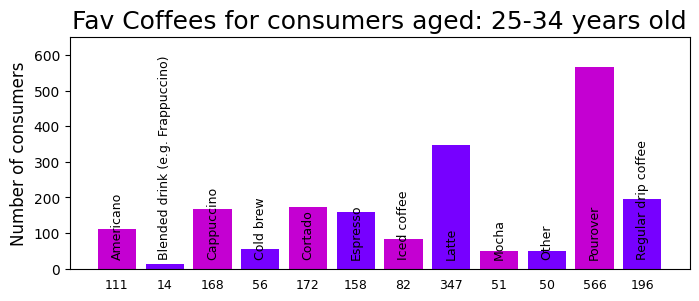

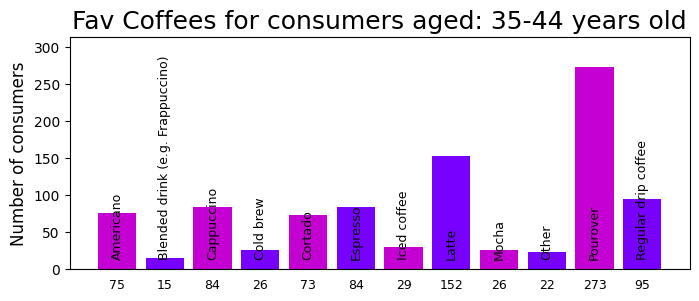

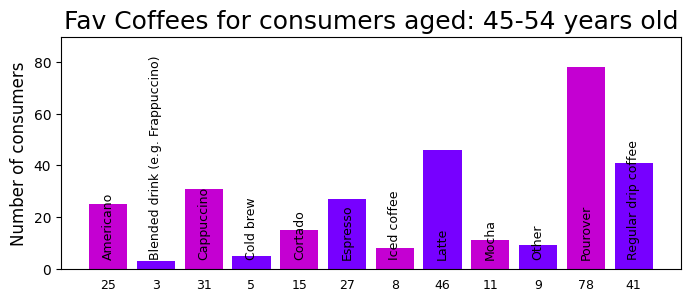

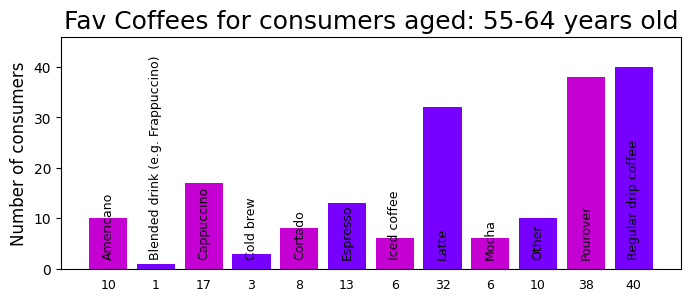

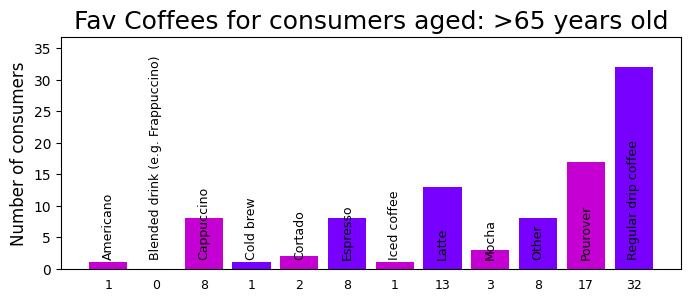

In [10]:
fav_coffee_by_age = survey_df.groupby(['age','favorite'], observed=True).size()
fav_coffee_by_age = fav_coffee_by_age.unstack(fill_value=0)

age_groups = fav_coffee_by_age.index
#favs = fav_coffee_by_age.columns
for grupo in age_groups:
    fav_count = fav_coffee_by_age.loc[grupo]

    fig, ax = plt.subplots(figsize=(8,4))

    bars = ax.bar(
        fav_count.index,
        fav_count.values,
        color=color_intercalado(list(fav_count.index))
    )

    ax.set_title("Fav Coffees for consumers aged: " + grupo, fontsize=18)
    ax.set_ylabel('Number of consumers', fontsize=12)
    #hide x axis
    ax.set_xticks([])

    for bar, label in zip(bars, fav_count.index):
        x_center = bar.get_x() + bar.get_width() / 2
        ax.text(
            x_center,
            0.04,                           
            label,
            ha='center',
            va='bottom',               
            rotation=90,
            fontsize=9,
            color='black',
            transform=ax.get_xaxis_transform(),
            clip_on=False
        )

    for bar in bars:
        x_center = bar.get_x() + bar.get_width() / 2
        ax.text(
            x_center,
            -0.04,                           
            f'{int(bar.get_height())}',
            ha='center',
            va='top',                   
            fontsize=9,
            transform=ax.get_xaxis_transform(),
            clip_on=False
        )

    plt.subplots_adjust(bottom=0.3)
    ax.set_ylim(0, fav_count.values.max() * 1.15)

    plt.show()

